In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'iris_modified.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    100 non-null    int64  
 1   sepal_length  100 non-null    float64
 2   sepal_width   100 non-null    float64
 3   petal_length  100 non-null    float64
 4   petal_width   100 non-null    float64
 5   species       100 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 4.8+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.describe()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,5.471000,3.099000,2.861000,0.786000
std,29.011492,0.641698,0.478739,1.449549,0.565153
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,24.750000,5.000000,2.800000,1.500000,0.200000
50%,49.500000,5.400000,3.050000,2.450000,0.800000
75%,74.250000,5.900000,3.400000,4.325000,1.300000
max,99.000000,7.000000,4.400000,5.100000,1.800000


### Data analysis

<AxesSubplot:>

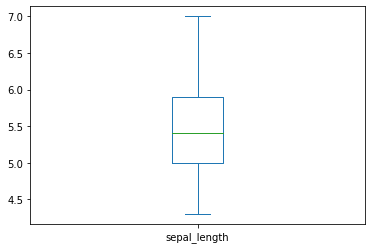

In [6]:
df['sepal_length'].plot(kind = 'box')

<AxesSubplot:>

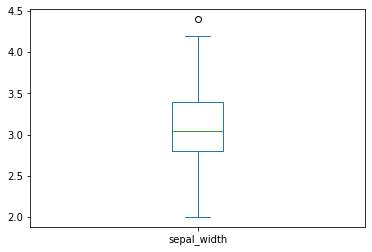

In [7]:
df['sepal_width'].plot(kind = 'box')

In [8]:
df = df[df['sepal_width'] != df['sepal_width'].max()]

<AxesSubplot:>

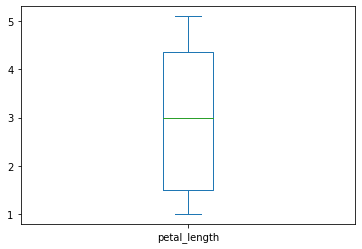

In [9]:
df['petal_length'].plot(kind = 'box')

<AxesSubplot:>

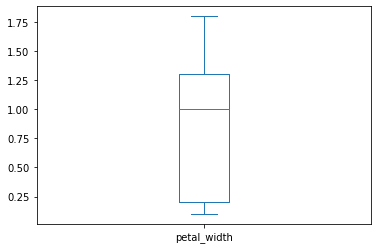

In [10]:
df['petal_width'].plot(kind = 'box')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    99 non-null     int64  
 1   sepal_length  99 non-null     float64
 2   sepal_width   99 non-null     float64
 3   petal_length  99 non-null     float64
 4   petal_width   99 non-null     float64
 5   species       99 non-null     object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.4+ KB


<AxesSubplot:xlabel='sepal_length', ylabel='species'>

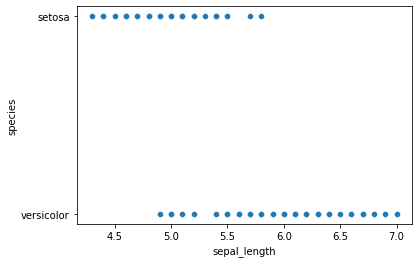

In [12]:
sns.scatterplot(data=df,x="sepal_length", y="species")

- By above plot it is clear that setosa and versicolor are not linearly separable. i.e, by vizualizing the points we cannot identify correctly.

<AxesSubplot:xlabel='sepal_width', ylabel='species'>

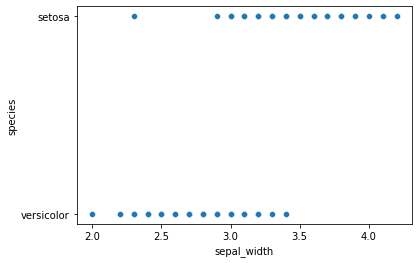

In [13]:
sns.scatterplot(data=df,x="sepal_width", y="species")

- By above plot it is clear that setosa and versicolor are not linearly separable. i.e, by vizualizing the points we cannot identify correctly.

<AxesSubplot:xlabel='petal_length', ylabel='species'>

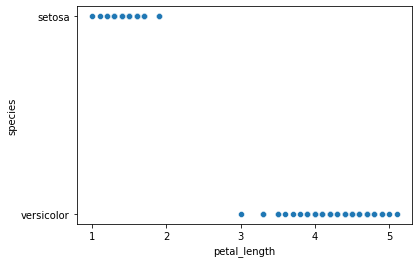

In [14]:
sns.scatterplot(data=df,x="petal_length", y="species")

<AxesSubplot:xlabel='petal_width', ylabel='species'>

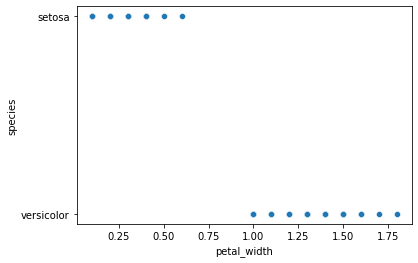

In [15]:
sns.scatterplot(data=df,x="petal_width", y="species")

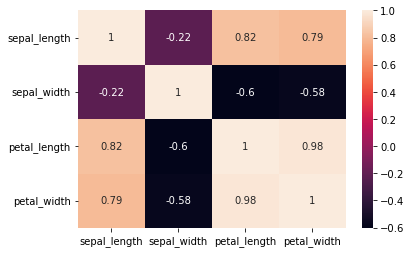

In [16]:
sns.heatmap(df[['sepal_length','sepal_width','petal_length','petal_width']].corr(),annot= True)
plt.show()

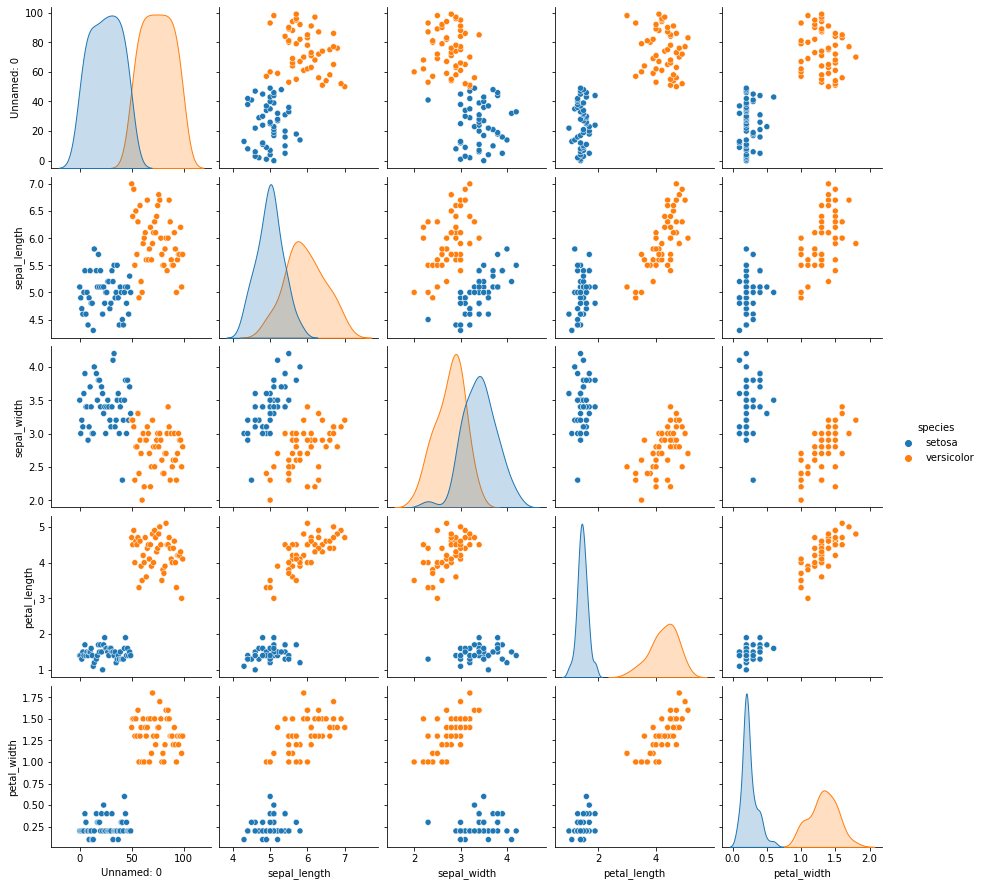

In [17]:
sns.pairplot(df, hue='species')

## Observations:
- From above analysis the separation of species is linear in case of petal length and petal width           

- From above analysis petal length and petal width are most important features to identify their species.

In [18]:
df['species'].value_counts()

versicolor    50
setosa        49
Name: species, dtype: int64

## Implementation of perceptron using perceptronic trick:

In [19]:
import random as rd

In [20]:
df['species'].value_counts()

versicolor    50
setosa        49
Name: species, dtype: int64

In [21]:
df['species'] = df['species'].apply(lambda x: 1 if x == "setosa" else 0)

In [22]:
learning_rate = 0.01
w0 = 1
w1 = rd.random()
w2 = rd.random()
W = [w1,w2,w0]


for _ in range(1500):
    for i in range(len(df)):
        index = np.random.choice(df.index)

        x = df.loc[index, ["petal_length", "petal_width"]].values
        y = df.loc[index, "species"]
        
        # dot product between weights and inputs 
        z = np.dot(W[:2], x) + W[2]

        pred_label = 1 if z>0 else 0
        # checking for correctly classified
        if pred_label != y:
            # If not correctly classified
            if z > 0 and y==0:
                W[:2] -= learning_rate * x
                W[2] -= learning_rate
            elif z<0 and y==1:
                W[:2] += learning_rate * x
                W[2] += learning_rate
        else:
            break

w1, w2, w0 = W

print("Optimal Weights & Bias:", W)
print("Optimal inputs:",x)
print('------------------')

# Equation of a line using above optimal weights,inputs and bias
line_eqn = w1*x[0] + w2*x[1] + w0
print('line_equation:',line_eqn)
print('------------------')

# Finding slopes and intercept
m= -(w1/w2)
c= -(w0/w2)
print('slope:',m)
print('intercept:',c)

# to plot a graph using above slope equation
x_axis = np.linspace(0, 6, 99)
y_axis = m*x_axis + c

Optimal Weights & Bias: [-0.37316493963916175, 0.2460112573950627, 0.7399999999999998]
Optimal inputs: [4.5 1.5]
------------------
line_equation: -0.5702253422836341
------------------
slope: 1.5168612346869415
intercept: -3.0079924302474264


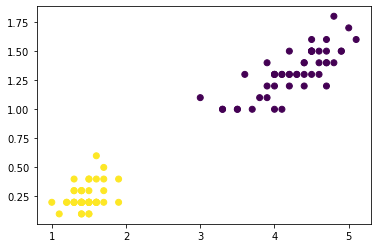

In [23]:
plt.scatter(x=df['petal_length'],y=df['petal_width'],c=df['species'])
plt.show()

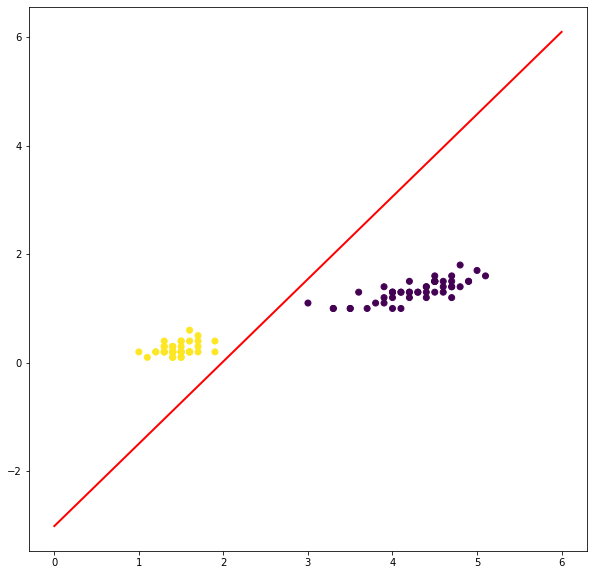

In [24]:
plt.figure(figsize=(10,10))
plt.plot(x_axis,y_axis,color="red",linewidth=2)
plt.scatter(x=df['petal_length'],y=df['petal_width'],c = df['species'])

plt.show()

In [25]:
df['petal_length'].min()

1.0

In [26]:
df['petal_length'].max()

5.1

In [27]:
df['petal_width'].min()

0.1

In [28]:
df['petal_width'].max()

1.8